In [1]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import wfdb
import biosignalsnotebooks as bsnb
from wfdb import processing
from matplotlib import pyplot as plt
from scipy import signal
from biosppy.signals import ecg
np.set_printoptions(threshold=sys.maxsize)
import umap
import sklearn.utils as slu
from sklearn.model_selection import LeaveOneOut

In [2]:
from sklearn.manifold import TSNE

In [ ]:
# store = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/100'
# record = wfdb.rdrecord(store, sampto=100)
# # wfdb.plot_wfdb(record, title='Record 100 from MIT-BIH Arrhythmia database') 
# display(record.__dict__)

In [ ]:
# data, header = bsnb.load_signal("ecg_4000_Hz", get_header=True)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


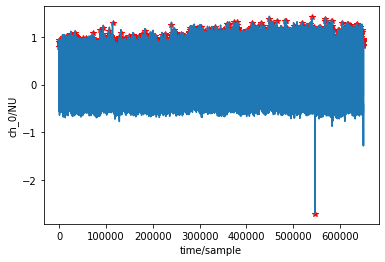

In [ ]:
# sig, fields = wfdb.rdsamp(store, channels=[0])
# xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
# xqrs.detect()
# wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

In [ ]:
# file_path = glob.glob('./mit-bih-arrhythmia-database-1.0.0/*.atr')
# files = [i[:-4] for i in file_path]
# files.sort()


# file = './mit-bih-arrhythmia-database-1.0.0/100'

# ann_ref = wfdb.rdann(file, 'atr')

# number_of_rpeaks = len(ann_ref.symbol)

# values = np.zeros((48,2))
# classes = ['N','R','L','V','A','E']
# for i in range(len(files)):
#     signals, fields = wfdb.rdsamp(files[i])
#     annotation = wfdb.rdann(files[i], 'atr')
#     for j in classes:
#         ids = np.in1d(annotation.symbol, j)
#         beats = annotation.sample[ids]
#         values[i] = [j,len(beats)]

# print(values)



# n = ['N']
# v = ['V']

# check_normal = np.in1d(ann_ref.symbol, n)
# check_v = np.in1d(ann_ref.symbol, v)

# normal_beats = ann_ref.sample[check_normal]
# v_beats = ann_ref.sample[check_v]

# print(len(check_normal))

# comparitor = processing.compare_annotations(ann_ref.sample[1:], xqrs.qrs_inds, int(0.1 * fields['fs']), sig[:,0])
# comparitor.print_summary()
# comparitor.plot()

In [3]:

# def get_data(path):
#     file_path = glob(path)
#     files = [i[:-4] for i in file_path]
#     files.sort()
#     return files

## Histogram

In [10]:

# print(len(get_data()))
# path = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/*.atr'
# file_list = get_data(path)

# ann_list = []
# for i in range(len(file_list)): #going through each of the 48 files...
#     data_file = file_list[i] #one file of the 48
#     record = wfdb.rdsamp(data_file)  #returns an array of the sample
#     ann_ref = wfdb.rdann(data_file, 'atr') #reading annotations in the file
#     ann_list.extend(ann_ref.symbol)
    
# ann_array = np.array(ann_list)
# print(ann_array.shape)
# # annp = wfdb.rdann(file_list[7], 'atr')
# # print(len(annp.symbol))
# # print(annp.label_store)



# actual_beats = ['N','L','R','B','A','a','J','S','V','r',
#              'F','e','j','n','E','/','f','Q','?']

# ann_dict = {}

# for i in ann_array:
#     ann_dict[i] = ann_dict.get(i,0)+1

# ann_dict = {k:v for k,v in ann_dict.items() if k in actual_beats}


# plt.figure(figsize=(12,8))

# xlocs, xlabs = plt.xticks()

# bars = plt.bar(list(ann_dict.keys()), ann_dict.values(), width=.7)
# plt.title("Heart beat classification by annotation")
# xlocs = [i for i in ann_dict.keys()]
# ylabs = [i for i in ann_dict.values()]

# plt.xlabel("Annotations")
# plt.ylabel("Number of beats")

# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x(), yval + 300, yval)
    

# redundant code
# xlocs = [i/2 for i in range(len(ann_dict.keys()))]
# for i, v in enumerate(ann_dict.values()):
#     plt.text((xlocs[i] - 0.25, v + 0.01, str(v)))

# print(np.array(ann_ref.symbol).shape)
# print(record[1].get('fs'))
# print(record[0].shape)
# print(len(ann_ref.num)) #prints number of annotations (no of beats) 
# # num is the labelled annotation number for each annotation
# print(ann_ref.symbol)

## Visualising the Data per Patient

In [ ]:
#Visualising the data
# file_index = 0 #0 to 47 files in the database

# current_file = file_list[file_index]

# record = wfdb.rdsamp(current_file)
# ann_ref = wfdb.rdann(current_file, 'atr')



# samp_start = 0
# samp_end = 6500
# samples = samp_end - samp_start
# #picking first record, picking first channel, 
# #going from samp_start to samp_end in that channel
# channel = record[0][samp_start:samp_end, 1]
# #record is coming fromt the FIRST cell using the first file, change it there to see next file
# time = (np.arange(samples, dtype='float')+ samp_start)/record[1].get('fs')

# plt.figure(figsize=(20,10))
# plt.plot(time,channel)


# peak_location=np.logical_and(ann_ref.sample >= samp_start, ann_ref.sample < samp_end)
# #.sample returns a numpy array containing the annotation locations in samples relative to the beginning of the record
# #i.e., where each beat is
# anns = ann_ref.sample[peak_location] - samp_start
# ann_types = np.array(ann_ref.symbol)
# req_ann_types = ann_types[peak_location]
# print(ann_types.shape, req_ann_types.shape)


# ann_time = time[anns]
# plt.plot(ann_time, np.ones_like(ann_time)*channel.max()*1.4,'ro')


# for index, annotation in enumerate(anns):
#     plt.annotate(ann_types[index], xy = (time[annotation], channel.max()*1.1))

    
# plt.xlim([samp_start / record[1].get('fs'), (samp_end/record[1].get('fs'))+1])
# plt.xlabel('offset')
# plt.ylabel(record[1].get('sig_name')[1])
# plt.show()
# q = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])
# print(q.shape)
# for i, z in enumerate(q):
#     print(z)

In [8]:

# for file in file_list:
#     path = file.split('/')
#     fn = path[-1]
#     record = wfdb.rdsamp(file)
#     ecg_val = record[0].T
#     ann_ref = wfdb.rdann(file,'atr')

#     ann_list = np.array(ann_ref.symbol)
#     ann_number = np.zeros_like(ann_list, dtype='float')
    
#     for annid, anno in enumerate(ann_list):
#         if anno == 'N':
#             ann_number[annid] = 1.0
#         elif anno == 'L':
#             ann_number[annid] = 2.0
#         elif anno == 'R':
#             ann_number[annid] = 3.0
#         elif anno == 'A':
#             ann_number[annid] = 4.0
#         elif anno == 'V':
#             ann_number[annid] = 5.0
#         elif anno == 'F':
#             ann_number[annid] = 6.0
#         elif anno == 'f':
#             ann_number[annid] = 7.0
#         elif anno == '/':
#             ann_number[annid] = 8.0
#     all_ann_numbers = np.zeros_like(ecg_val[0], dtype='float')
#     all_ann_numbers[ann_ref.sample] = ann_number

#     for ch_id, channel in enumerate(ecg_val): #enumerates the 2 channels - so 0 and 1
#         channel_name = record[1].get('sig_name')[ch_id]
#         print("ECG channel: ", channel_name)
        
#         ecg_output = ecg.ecg(signal=channel, sampling_rate=360, show=False)
#         rpeaks = np.zeros_like(channel, dtype='float')
#         rpeaks[ecg_output['rpeaks']] = 1.0
        

#         all_beats = np.array(np.split(channel, ecg_output['rpeaks']))

#         remove_beats = [0]
#         for i, i_val in enumerate(ecg_output['rpeaks']):
#             first = i == 0
#             last = i == len(all_beats) - 1
            
#             if first or last:
#                 continue
            
#             if i_val < 10:
#                 from_i = 0
#             else:
#                 from_i = i_val - 10
#             to_i = i_val + 10
#             anno = all_ann_numbers[from_i:to_i].max()
            
#             if anno == 0.0:
#                 remove_beats = np.append(remove_beats, i)
#                 continue
            
#             all_beats[i] = np.append(all_beats[i][150:], all_beats[i+1][:185])
            
#             # standardise the data
#             all_beats[i] = (all_beats[i]-np.mean(all_beats[i]))/np.std(all_beats[i])

# #             newsize = int((all_beats[i].size * 125 / 360))
# #             all_beats[i] = signal.resample(all_beats[i], newsize)
# #             print(all_beats[i].shape)
#             if all_beats[i].size > 430:
#                 remove_beats = np.append(remove_beats, i) #here is the problem! removing all beats when frequency is not resampled why?
#                 continue
            
#             zerocount = 430 - all_beats[i].size
#             all_beats[i] = np.pad(all_beats[i], (0, zerocount), 'constant', constant_values=(0.0, 0.0))
#           #  print(all_beats[i].shape)
            
#             all_beats[i] = np.append(all_beats[i], anno)
#             # print(all_beats[i].shape)
#             all_beats[i] = np.append(all_beats[i], fn)
#            # print(all_beats[i].shape)
#             all_beats[i] = np.append(all_beats[i], ch_id)
#         remove_beats = np.append(remove_beats, len(all_beats)-1)
# #         print(remove_beats.shape)
#         all_beats = np.delete(all_beats, remove_beats)
#         #print(all_beats.shape)
#         savedata = np.array(list(all_beats[:]), dtype=np.float)
        
#         outfn = 'data_ecg/'+fn+'_'+channel_name+'.csv'
#         print('    Generating ', outfn)
#         if not os.path.exists('data_ecg/'):
#             os.makedirs('data_ecg/')
#         with open(outfn, "wb") as fin:
#             np.savetxt(fin, savedata, delimiter=",", fmt='%f')
            
    

In [9]:
# all_data = np.empty(shape=[0,433])
# print(all_data.shape)
# csv_files = glob('./data_ecg/*.csv')

# for file in  csv_files:
#     heartbeat = np.loadtxt(file, delimiter=',')
#     all_data = np.append(all_data, heartbeat, axis=0)

# print("loaded all data")
# print(all_data.shape)

## Visualise the heartbeats

In [11]:
# data = np.loadtxt('/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/data_ecg/100_MLII.csv', delimiter=',')
# for beat_num in [0,1,2,3,4,5,6,7]:
#     time_value = np.arange(430, dtype = 'float') / 430
#     current_beat = data[beat_num][:-3]
#     ann_num = data[beat_num][-3]
#     plt.figure(figsize=(20,5))
#     plt.plot(time_value, current_beat)
#     plt.xlabel('Time in seconds')
#     plt.ylabel('beat number: ' + str(beat_num) + ' type of beat: ' + str(ann_num))

In [ ]:
# print(all_data.shape)

(136921, 433)


## Resampling the data
### all the data from each class is sampled to the same number of beats by taking the mean of all the abnormal classes and then resampling all classes to that number

In [12]:
seed=42
# np.random.seed(seed)
# def downsample(arr,n,seed):
#     downsampled = slu.resample(arr,replace=False,n_samples=n,random_state=seed)
#     return downsampled

# def upsample(arr,n,seed):
#     upsampled = slu.resample(arr,replace=True,n_samples=n,random_state=seed)
#     return upsampled
    


In [13]:
# #discrepancy in number of heartbeats compared to histogram because here we are considering annotations from BOTH channels per patient
# # whereas, rdann only reads the annotations once per patient
# anno = all_data[:,-3]
# normal = all_data[anno == 1.0]
# lbbb = all_data[anno == 2.0]
# rbbb = all_data[anno == 3.0]
# apb = all_data[anno == 4.0]
# pvc = all_data[anno == 5.0]
# fvn = all_data[anno == 6.0]
# fpn = all_data[anno == 7.0]
# paced = all_data[anno == 8.0]

# abnormal = [lbbb,rbbb,apb,pvc,fvn,fpn,paced]
# list_len = [len(i) for i in abnormal]
# # print(list_len)

# all_classes = [normal,lbbb,rbbb,apb,pvc,fvn,fpn,paced]

# num_of_vals = np.mean(list_len, dtype=int)
# # print(num_of_vals)

# sampled_data = []
# for i in all_classes:
#     if i.shape[0] > num_of_vals:
#         i = downsample(i, num_of_vals,seed)
#     elif i.shape[0] < num_of_vals:
#         i = upsample(i, num_of_vals,seed)
#     sampled_data.append(i)


# sampled_data = np.concatenate(sampled_data)
# #print(sampled_data[0])
# np.random.shuffle(sampled_data)
# #print(sampled_data.shape)


# with open('sampled_data.csv', 'wb') as s:
#     np.savetxt(s,sampled_data,delimiter=',', fmt='%f')


# Only required to run from here using sampled_data.csv

In [3]:
#sampled = np.empty(shape=[0,433])
sampled_csv = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/sampled_data.csv'
#with open('./sampled_data.csv', 'rb') as sampled_csv:
# for i in sampled_csv:
#     print('Loading', i)
#     row = np.loadtxt(i, delimiter=',')
#     sampled = np.append(sampled, row, axis=0)
# print(sampled.shape)
print('Loading', sampled_csv)
sampled = np.genfromtxt(sampled_csv, delimiter=',')
print(sampled.shape)

Loading /Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/sampled_data.csv
(39640, 433)


## Segmenting the data for training and testing using LOOCV Dataset A  
### Intra-patient

In [4]:
#LOOCV within one patient, choose patient number
# patient = 100
# patient_sample = sampled[sampled[:,-1] == patient]
# print(patient_sample.shape)

In [5]:
# # LOOCV function to split into train and test for one patient
# # need to figure out average
# def loocv(patient_sample):
#     x = patient_sample[:,:-2]
#     y = patient_sample[:,-2]
#     group = patient_sample[:,-1]

#     cv = LeaveOneOut()
#     n = cv.get_n_splits(x,y=y,groups=group)
#     #print(n)

#     split = cv.split(X=x,y=y,groups=group)

#     train = []
#     test = []
#     for train_index, test_index in split:
#         train.append(train_index)
#         test.append(test_index)

#     train = np.array(train)
#     test = np.array(test)
#     x_train_data = x[train]
#     x_test_data = x[test]
#     y_train_data = y[train]
#     y_test_data = y[test]
    
#     return x_train_data, x_test_data, y_train_data, y_test_data


# x_train_data, x_test_data, y_train_data, y_test_data = loocv(patient_sample)

In [6]:
#Leave one patient out and store each segment in train test arrays
from sklearn.model_selection import LeaveOneGroupOut
def leave_one_patient():
    x = sampled[:,:-2]
    y = sampled[:,-2]
    groups = sampled[:,-1]
    lopo = LeaveOneGroupOut()
    lopo.get_n_splits(x,y,groups)
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    for train_index, test_index in lopo.split(x,y,groups):
        x_tr, x_te = x[train_index], x[test_index]
        y_tr, y_te = y[train_index], y[test_index]
        x_train.append(x_tr)
        x_test.append(x_te)
        y_train.append(y_tr)
        y_test.append(y_te)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = leave_one_patient()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [7]:
#calculates average for lopo and trains model, returns score
def score_calculator(model, X_train_arr, y_train_arr, x_test_arr, y_test_arr):
    score_arr = []
    for xtr, ytr, xt, yt in zip(X_train_arr, y_train_arr, x_test_arr, y_test_arr):
        model.fit(xtr, ytr)
        model_pred = model.predict(xt)
        score = accuracy_score(yt, model_pred)
        score_arr.append(score)
    
    mean_score = np.mean(score_arr)
    return score_arr, mean_score
    

In [ ]:
#IGNORE = for old loocv
# fit = umap.UMAP()
# %time u = fit.fit_transform(x_train[0])

# x_tsne = TSNE(n_components=2, perplexity=5, random_state=seed).fit_transform(x_train)
# scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1], c = y_train, cmap=plt.cm.plasma)

In [ ]:
#IGNORE = for old loocv
# plt.figure(figsize=(10,6))

# scatter = plt.scatter(u[:,0], u[:,1], c=y_train[0], cmap= plt.cm.plasma)
# plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
# plt.xlabel('dimension 1')
# plt.ylabel('dimension 2')
# plt.title('UMAP of all heartbeats')

In [ ]:
#IGNORE = for old loocv - PCA
# from sklearn.decomposition import PCA
# x_pca = PCA(n_components=50,random_state=seed).fit_transform(x_train[0])

# scatter = plt.scatter(x_pca[:,0],x_pca[:,1], c=y_train[0])
# plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')

In [ ]:
#x_tsne = TSNE(n_components=2, perplexity=50, random_state=seed).fit_transform(x_pca)


In [ ]:
# fit = umap.UMAP()
# %time u = fit.fit_transform(x_tsne)


In [ ]:
# plt.figure(figsize=(10,10))
# scatter = plt.scatter(u[:,0],u[:,1], c = y_train[0])
# plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')

# 75/25 Train Test Split - Dataset B

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled[:,:-3], sampled[:,-3], test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29730, 430) (9910, 430) (29730,) (9910,)


#### Confusion Matrix Function

In [9]:
def scores(predictions):
  accuracy = accuracy_score(y_test, predictions)
  precision_micro = precision_score(y_test, predictions, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  precision_macro = precision_score(y_test, predictions, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  f1_macro = f1_score(y_test, y_pred, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  f1_micro = f1_score(y_test, y_pred, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  return accuracy, precision_macro, precision_micro, f1_macro, f1_micro

In [10]:
def cf_matrix_func(predictions):
    cm = confusion_matrix(y_test, predictions)
    categories=['N', 'L', 'R', 'A', 'V', 'F', 'f','P']
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, 
                fmt='.2%', cmap='Blues',xticklabels=categories,yticklabels=categories)    

## XGBOOST

In [103]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
# print(model.score(X_test, y_test))
#print(model)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
predictions_xgb = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

NameError: name 'model' is not defined

###### Confusion Matrix

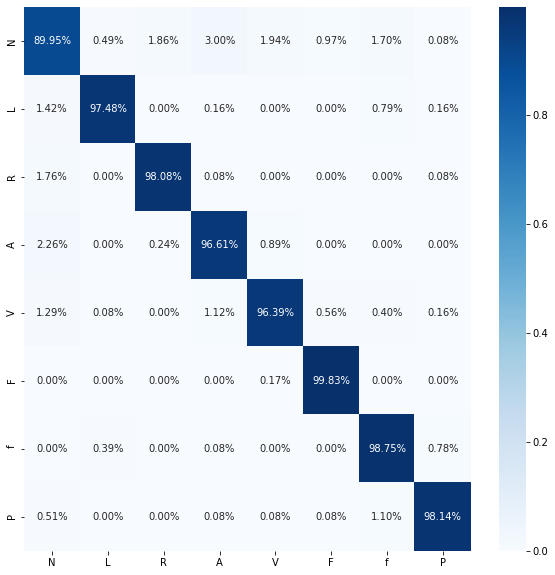

In [113]:
cf_matrix_func(predictions_xgb)

##### Precision, Accuracy, F1 score

In [48]:
scores(predictions_xgb)

(0.8749747729566095,
 0.8731477044404179,
 0.8749747729566095,
 0.8736779791223797,
 0.8749747729566095)

### UMAP fit on x_test

In [ ]:
fit = umap.UMAP()
%time u = fit.fit_transform(X_test)

### UMAP for xgboost

Text(0.5, 1.0, 'UMAP of all heartbeats')

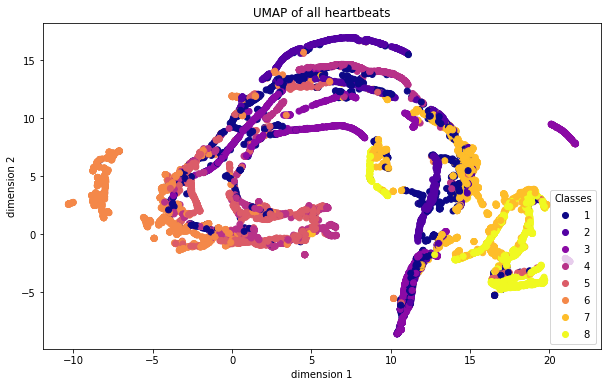

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=y_pred, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2') 
plt.title('UMAP of all heartbeats')

### UMAP on y_test

Text(0.5, 1.0, 'UMAP of all heartbeats')

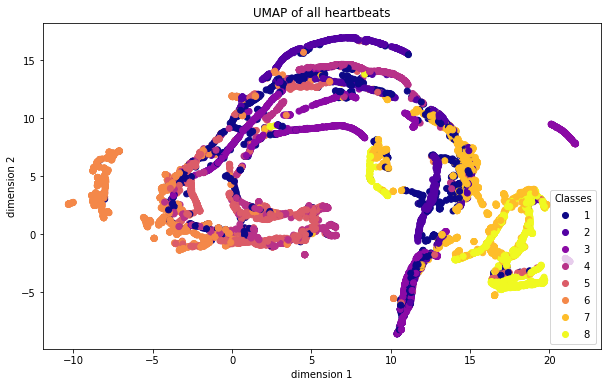

In [ ]:
# fit = umap.UMAP()
# %time u = fit.fit_transform(X_test)

plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=y_test, cmap= plt.cm.plasma) 
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('UMAP of all heartbeats')

### PCA and t-SNE on XGBoost

In [ ]:
#y_test and y_pred for comparison - PCA and tsne
# from sklearn.decomposition import PCA
# patient = 112
# pat_samp = sampled[sampled[:,-1]==patient]
# x = pat_samp[:,:-2]
# y = pat_samp[:,-2]
# pca = PCA(n_components=50,random_state=seed)
# x_pca = pca.fit_transform(x[:,:-2])
# plt.figure(figsize=(10,6))
# scatter = plt.scatter(x_pca[:,0],x_pca[:,1], c=y)
# plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')


In [ ]:
# var_rat = pca.explained_variance_ratio_
# var_total = np.sum(var_rat)
# print(var_total)

## Support Vector Machines

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(sampled[:,:-2])
feature_scaled = scaler1.transform(sampled[:,:-2])

pca1 = PCA(n_components=4)
pca1.fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)

print(feature_scaled_pca.shape)

(39640, 4)


In [ ]:
# plt.figure(figsize=(20,10))
# plt.scatter(
#     x=feature_scaled_pca[:,0],
#     y=feature_scaled_pca[:,1], 
#     c=sampled[:,-2],
#     cmap='tab10'
# )
# plt.set_xlabel('pca-one')
# plt.set_ylabel('pca-two')

# plt.show()

In [26]:
#pca and tsne on y_test and then y_pred to compare
from sklearn import svm
linear = svm.SVC(kernel='linear')
linear.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_lin, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Linear SVM Predictions')

In [52]:
from sklearn.metrics import accuracy_score
predictions_lin = linear.predict(X_test)


In [53]:
scores(predictions_lin)

(0.6890010090817357,
 0.696780810760853,
 0.6890010090817357,
 0.8736779791223797,
 0.8749747729566095)

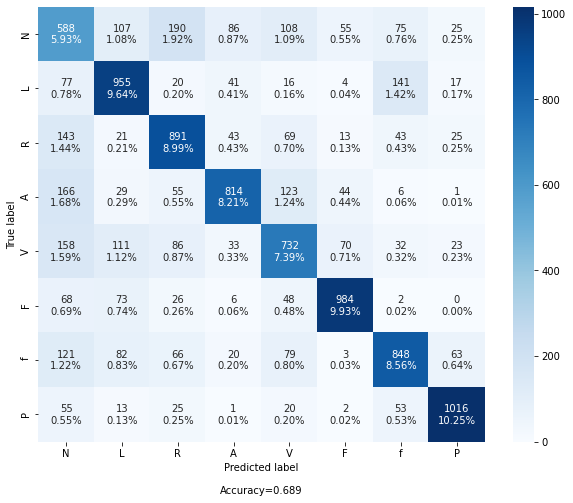

In [54]:
cf_matrix_func(predictions_lin)

In [34]:
quad = svm.SVC(kernel='poly', degree=2)
quad.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
predictions_quad = quad.predict(X_test)


In [56]:
scores(predictions_quad)

(0.8953582240161453,
 0.8949621987050577,
 0.8953582240161453,
 0.8736779791223797,
 0.8749747729566095)

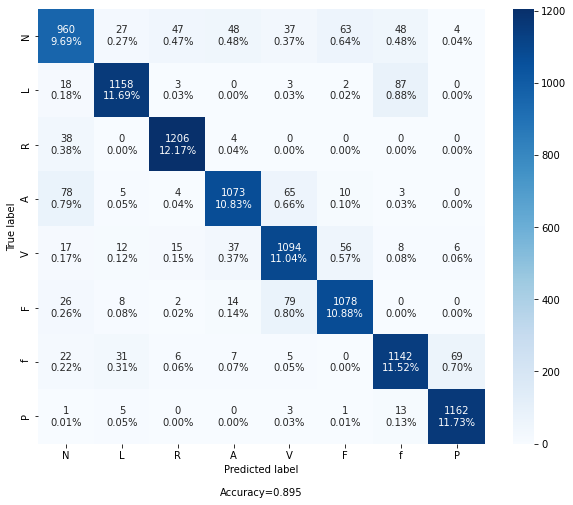

In [57]:
cf_matrix_func(predictions_quad)

CPU times: user 27.9 s, sys: 509 ms, total: 28.4 s
Wall time: 17.2 s


Text(0.5, 1.0, 'Quadratic SVM Predictions')

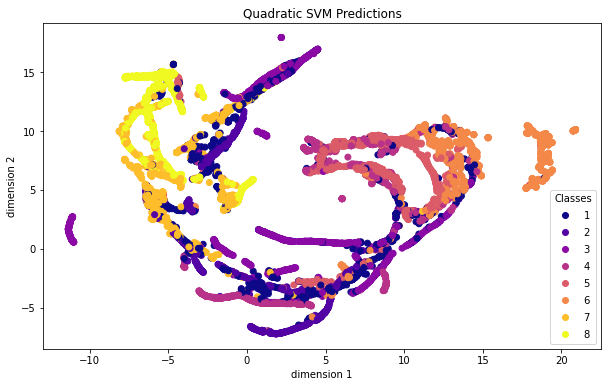

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_quad, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Quadratic SVM Predictions')

In [38]:
cubic = svm.SVC(kernel='poly', degree=3)
cubic.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
predictions_cub = cubic.predict(X_test)


In [59]:
scores(predictions_cub)

(0.9095862764883955,
 0.9094215795411538,
 0.9095862764883955,
 0.8736779791223797,
 0.8749747729566095)

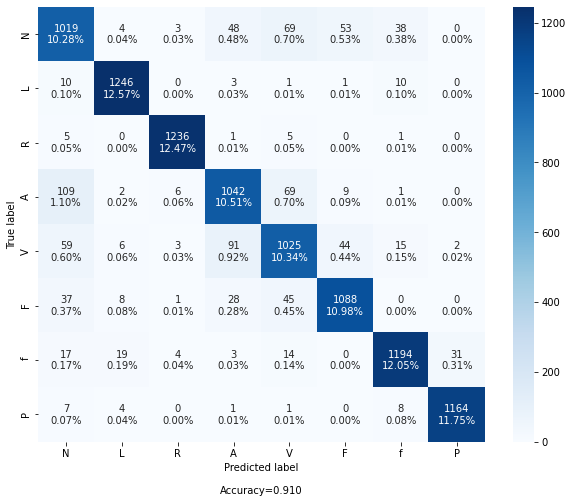

In [60]:
cf_matrix_func(predictions_cub)

CPU times: user 28.9 s, sys: 494 ms, total: 29.4 s
Wall time: 16.3 s


Text(0.5, 1.0, 'Cubic SVM Predictions')

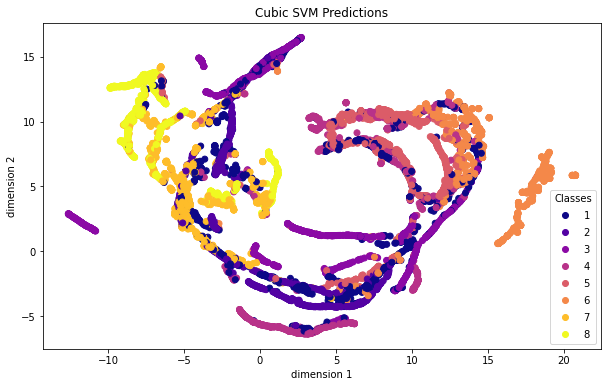

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_cubic, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Cubic SVM Predictions')

In [61]:
rbf = svm.SVC(kernel='rbf')
rbf.fit(X_train,y_train)
predictions_rbf = rbf.predict(X_test)


In [ ]:
scores(predictions_rbf)

In [ ]:
cf_matrix_func(predictions_rbf)

CPU times: user 28.2 s, sys: 492 ms, total: 28.7 s
Wall time: 16.7 s


Text(0.5, 1.0, 'RBF SVM Predictions')

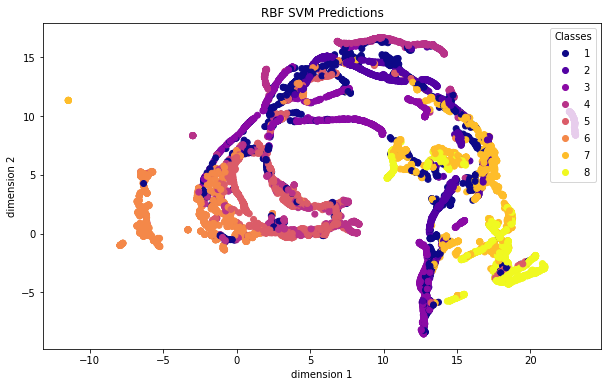

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_rbf, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('RBF SVM Predictions')

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
clf.fit(X_train, y_train)
predictions_rbf_2 = clf.predict(X_test)

In [ ]:
scores(predictions_rbf_2)

In [ ]:
cf_matrix_func(predictions_rbf_2)

CPU times: user 26.6 s, sys: 409 ms, total: 27 s
Wall time: 15.1 s


Text(0.5, 1.0, 'RBF 2 Predictions')

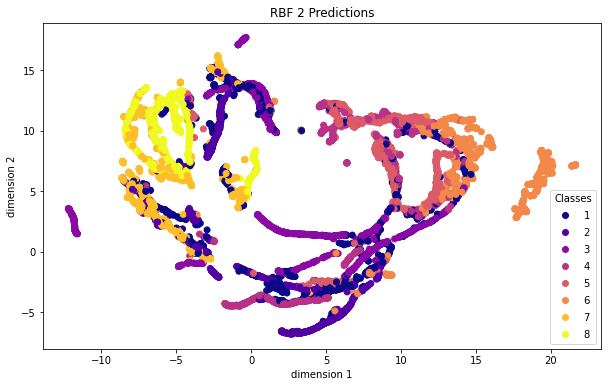

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_rbf_2, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('RBF 2 Predictions')

# UMAP for classification

In [ ]:
# %%time
# u = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=30, metric='euclidean').fit_transform(X_train, y=y_train)

In [ ]:
# fig, ax = plt.subplots(1, figsize=(14, 10))
# plt.scatter(*embedding.T, s=0.5, c=y_train, cmap='Spectral', alpha=1.0)
# plt.setp(ax, xticks=[], yticks=[])
# cbar = plt.colorbar(boundaries=np.arange(9))
# cbar.set_ticks(np.arange(8))
# cbar.set_ticklabels([1,2,3,4,5,6,7,8])
# plt.title('Fashion MNIST Embedded via UMAP using Labels');

# title="UMAP"
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(u[:,10], u[:,15], u[:,29], c=y_train, s=100)
# plt.title(title, fontsize=18)


In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data


# torch.manual_seed(1)

In [17]:
EPOCH = 100
BATCH_SIZE = 64
LR = 0.008

In [38]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # 59049 x 1
        self.conv1 = nn.Sequential(
            nn.Conv1d(1, 128, kernel_size=3, stride=3, padding=0),
            nn.BatchNorm1d(128),
            nn.ReLU())
        # 19683 x 128
        self.conv2 = nn.Sequential(
            nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(3, stride=3))
        # 6561 x 128
        self.conv3 = nn.Sequential(
            nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 2187 x 128
        self.conv4 = nn.Sequential(
            nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 729 x 256
        self.conv5 = nn.Sequential(
            nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 243 x 256
#         self.conv6 = nn.Sequential(
#             nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3),
#             nn.Dropout(p=0.5))
#         # 81 x 256
#         self.conv7 = nn.Sequential(
#             nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3))
#         # 27 x 256
#         self.conv8 = nn.Sequential(
#             nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3))
#         # 9 x 256
#         self.conv9 = nn.Sequential(
#             nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3))
#         # 3 x 256
#         self.conv10 = nn.Sequential(
#             nn.Conv1d(256, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(512),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3))
#         # 1 x 512 
#         self.conv11 = nn.Sequential(
#             nn.Conv1d(512, 512, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(512),
#             nn.ReLU(),
#             nn.Dropout(p=0.5))
        # 1 x 512 
        self.fc = nn.Linear(256, 50)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        # input x : 23 x 59049 x 1
        # expected conv1d input : minibatch_size x num_channel x width

        x = x.view(x.shape[0], 1,-1)
        # x : 23 x 1 x 59049

        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
#         out = self.conv6(out)
#         out = self.conv7(out)
#         out = self.conv8(out)
#         out = self.conv9(out)
#         out = self.conv10(out)
#         out = self.conv11(out) 
        
        out = out.view(x.shape[0], out.size(1) * out.size(2))
        logit = self.fc(out)

        #logit = self.activation(logit)

        return logit

In [39]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv1d(1, 128, kernel_size=(3,), stride=(3,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=

In [20]:

# train_data = []
# for i in range(len(X_train)):
#    train_data.append([X_train[i], y_train[i]])
# # train_data = train_data.long()
# train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
# # dataset = Data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
# # train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
# train_loader = train_loader
# test_x = Variable(torch.from_numpy(X_test))
# test_y = Variable(torch.from_numpy(y_test))
# #print(train_data[0:2])

In [41]:
# print(X_train[1])
# print(y_train.shape)
tensor_Xtrain = torch.from_numpy(X_train)
tensor_ytrain = torch.from_numpy(y_train)

train_data = Data.TensorDataset(tensor_Xtrain, tensor_ytrain)
train_loader = Data.DataLoader(train_data)

# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# print(type(images))
# print(images[0][1])
# print(labels.shape)

In [42]:
# optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
# loss_func = nn.CrossEntropyLoss()

In [44]:
# for epoch in range(EPOCH):
#     for step, (x,y) in enumerate(train_loader):
#         output = cnn(x)
#         loss = loss_func(output, y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         if step % 100 == 0:
#             test_output, last_layer = cnn(X_test)